In [37]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/cosmology/anaconda2/envs/radiometer/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [58]:
import numpy as np
import time
import visa

In [2]:
rm = visa.ResourceManager()
print(rm.list_resources())

(u'USB0::0x0957::0x0618::MY52210065::INSTR', u'ASRL1::INSTR')


In [3]:
multimeter = rm.open_resource('USB0::0x0957::0x0618::MY52210065::INSTR')
print(multimeter.query('*IDN?'))

Agilent Technologies,34405A,MY52210065,1.47-3.13



In [4]:
multimeter.write("TRIG:SOUR IMM")

(15L, <StatusCode.success: 0>)

In [5]:
print(multimeter.query('TRIG:SOUR?'))

IMM



In [6]:
multimeter.write("CONF:VOLT:DC:RANG 1")

(21L, <StatusCode.success: 0>)

In [7]:
print(multimeter.query("READ?"))

+1.35890000E-01 



In [68]:
2**12

4096

In [76]:
data = []
t = []
t0 = time.time()
for k in range(10000):
    t.append(time.time())
    data.append(multimeter.query_ascii_values("READ?")[0])

In [77]:
combined_data = np.column_stack((t,data))
print(combined_data)

[[  1.47768468e+09   1.34370000e-01]
 [  1.47768468e+09   1.34450000e-01]
 [  1.47768468e+09   1.34430000e-01]
 ..., 
 [  1.47768581e+09   1.34250000e-01]
 [  1.47768581e+09   1.34300000e-01]
 [  1.47768581e+09   1.34260000e-01]]


In [78]:
np.savetxt("2016-10-28_Pupin605_Vertical_long.txt",combined_data)

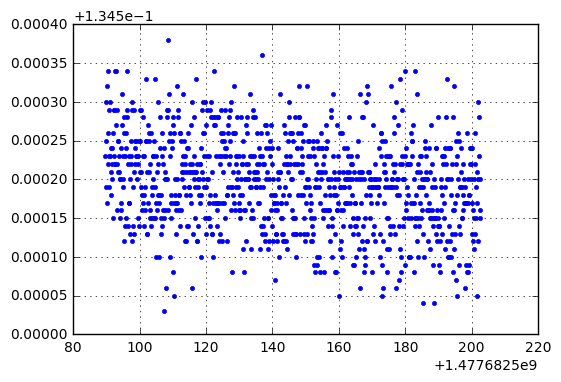

In [44]:
x = []
x=np.loadtxt("2016-10-28_Pupin605_Vertical_EccsorbI.txt")
time = x[:,0]
power_data = x[:,1]
plot(time, power_data, '.')
grid()
#ylim([0.136, 0.138])

0.13375877


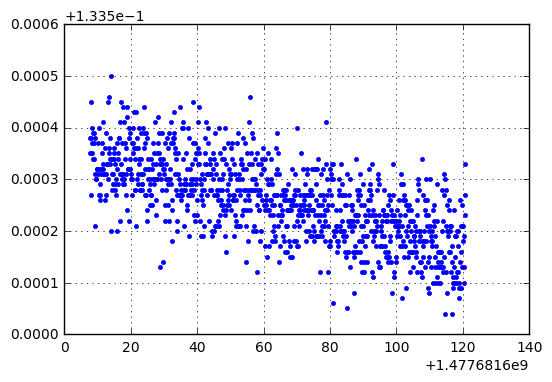

In [52]:
x = []
x=np.loadtxt("2016-10-28_Pupin605_Hor_Wall.txt")
time = x[:,0]
power_data = x[:,1]
plot(time, power_data, '.')
grid()
print(np.mean(power_data))
#ylim([0.136, 0.138])

(0.13469556999999999, 0.13596051000000001)


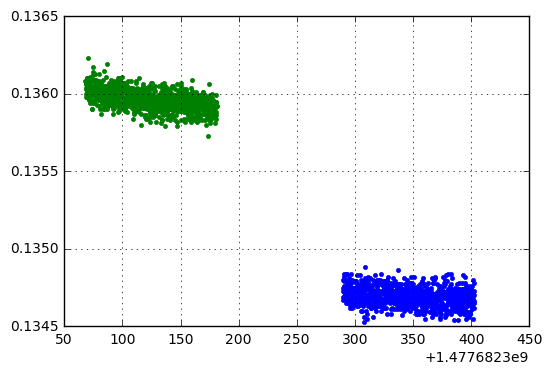

In [53]:
data1=np.loadtxt("2016-10-28_Pupin605_Vertical_EccosorbI_1.txt")
data2=np.loadtxt("2016-10-28_Pupin605_Vertical_EccosorbII_1.txt")
time1 = data1[:,0]
measuremets1 = data1[:,1]
time2 = data2[:,0]
measuremets2 = data2[:,1]
plot(time1, measuremets1, '.')
plot(time2, measuremets2, '.')
grid()
print(np.mean(measuremets1),np.mean(measuremets2))
#ylim([0.136, 0.138])

(0.13423214999999999, 0.13596051000000001)


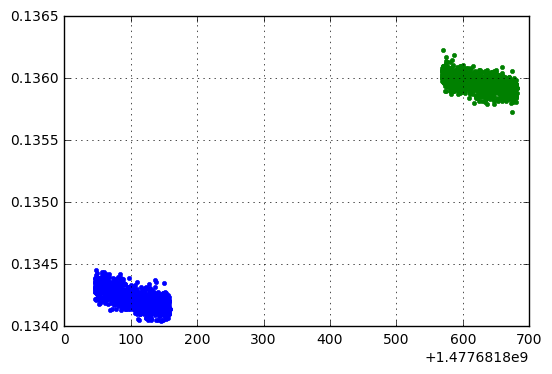

In [66]:
data1=np.loadtxt("2016-10-28_Pupin605_Hor_EccosorbII.txt")
data2=np.loadtxt("2016-10-28_Pupin605_Vertical_EccosorbII.txt")
time1 = data1[:,0]
measuremets1 = data1[:,1]
time2 = data2[:,0]
measuremets2 = data2[:,1]
plot(time1, measuremets1, '.')
plot(time2, measuremets2, '.')
grid()
print(np.mean(measuremets1),np.mean(measuremets2))
#ylim([0.136, 0.138])

(0.13521773000000001, 0.13513017000000002, 0.13497121000000001)


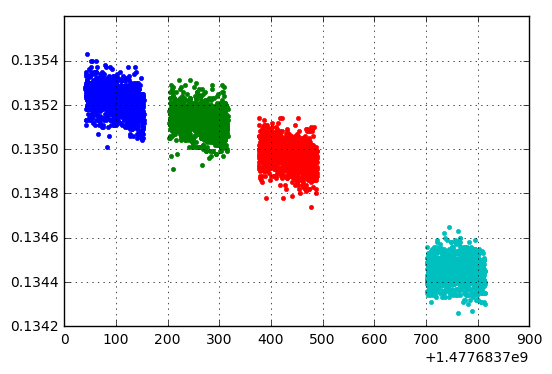

In [75]:
data1=np.loadtxt("2016-10-28_Pupin605_Vertical_EccosorbI_2.txt")
data2=np.loadtxt("2016-10-28_Pupin605_Vertical_EccosorbI_3.txt")
data3=np.loadtxt("2016-10-28_Pupin605_Vertical_EccosorbII_2.txt")
data4=np.loadtxt("2016-10-28_Pupin605_Vertical_2.txt")
time1 = data1[:,0]
measuremets1 = data1[:,1]
time2 = data2[:,0]
measuremets2 = data2[:,1]
time3 = data3[:,0]
measuremets3 = data3[:,1]
time4 = data4[:,0]
measuremets4 = data4[:,1]
plot(time1, measuremets1, '.')
plot(time2, measuremets2, '.')
plot(time3, measuremets3, '.')
plot(time4, measuremets4, '.')
grid()
print(np.mean(measuremets1),np.mean(measuremets2),np.mean(measuremets3))
#ylim([0.136, 0.138])

(0.134294672, 0.13513017000000002, 0.13497121000000001)


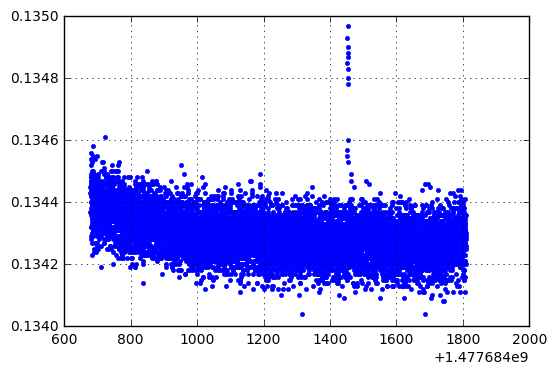

In [79]:
data1=np.loadtxt("2016-10-28_Pupin605_Vertical_long.txt")
time1 = data1[:,0]
measuremets1 = data1[:,1]
plot(time1, measuremets1, '.')
grid()
print(np.mean(measuremets1))
#ylim([0.136, 0.138])

In [65]:
data1=np.loadtxt("2016-10-28_Pupin605_Hor_EccosorbII.txt")
print(data1)
combined = np.column_stack((data1[0,:],data1[1,:]))
np.savetxt("2016-10-28_Pupin605_Hor_EccosorbII.txt",combined)

[[  1.47768185e+09   1.47768185e+09   1.47768185e+09 ...,   1.47768196e+09
    1.47768196e+09   1.47768196e+09]
 [  1.34320000e-01   1.34320000e-01   1.34380000e-01 ...,   1.34130000e-01
    1.34140000e-01   1.34140000e-01]]


In [36]:
period = np.mean(np.diff(t))
rate = 1./period

In [37]:
rate

8.8424717923182499

In [38]:
period

0.11309055018628765

In [39]:
freqs = np.fft.rfftfreq(n=1024, d=period)
datafft = np.fft.rfft(data, n=1024)
psd = (period/len(t)) * np.abs(datafft)

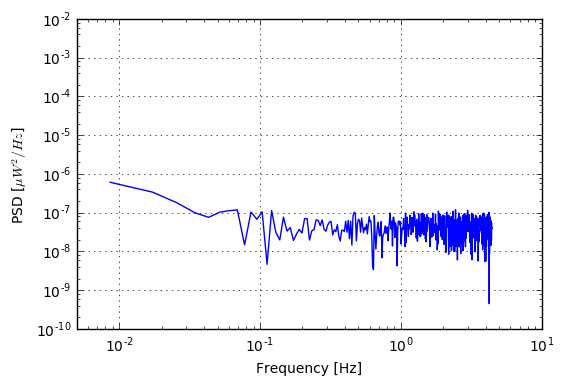

In [40]:
loglog(freqs, psd)
#ylim([1e-7, 1e-5])
xlim([5e-3, 10])
xlabel('Frequency [Hz]')
ylabel('PSD [$\mu W^2 / Hz$]')
grid()

0.13469556999999999

In [24]:
freqs = np.fft.rfftfreq(n=1024/32, d=period)
datafft = np.fft.rfft(data, n=1024/32)
psd = (period*32/len(t)) * np.abs(datafft)

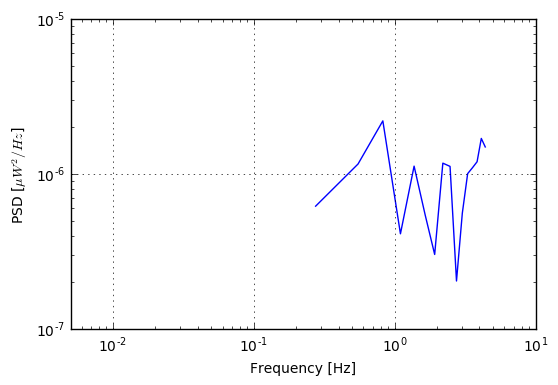

In [25]:
loglog(freqs, psd)
ylim([1e-7, 1e-5])
xlim([5e-3, 10])
xlabel('Frequency [Hz]')
ylabel('PSD [$\mu W^2 / Hz$]')
grid()

In [26]:
nk = 32
nl = len(t)/nk
freqs = np.fft.rfftfreq(n=nl, d=period)
psdavg = np.zeros(nl/2 + 1)
for k in range(nk-1):
    datafft = np.fft.rfft(data[k*nl:(k+1)*nl], n=nl)
    psdavg += (period/nl) * np.abs(datafft)
psdavg /= nk

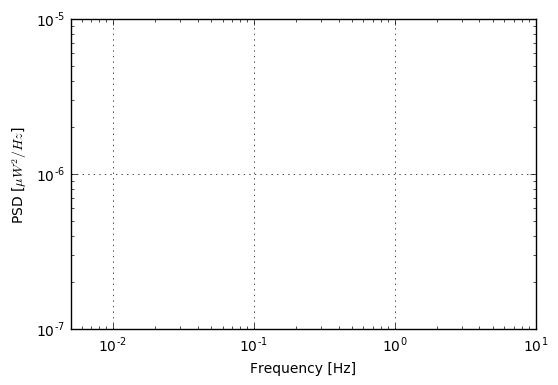

In [27]:
loglog(freqs, psdavg)
loglog(freqs, np.mean(psdavg[1:])*np.ones(len(psdavg)))
ylim([1e-7, 1e-5])
xlim([5e-3, 10])
xlabel('Frequency [Hz]')
ylabel('PSD [$\mu W^2 / Hz$]')
grid()

In [63]:
np.mean(psdavg[1:])

9.933762484016659e-07